# Time Series - Moving Average Exercise 2

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [17]:
df = pd.read_csv('AMZN.csv',index_col=0, usecols=[0,4],
     parse_dates=True, infer_datetime_format=True)
df

,ClosingPrice
Date,
2018-10-18,1770.719971
2018-10-19,1764.030029
2018-10-22,1789.300049
2018-10-23,1768.699951
2018-10-24,1664.199951
...,...
2019-10-11,1731.920044
2019-10-14,1736.430054
2019-10-15,1767.380005


In [18]:
print(df.dtypes)

ClosingPrice    float64
dtype: object


In [19]:
first_date=df.index[0]
first_date

Timestamp('2018-10-18 00:00:00')

In [20]:
df.ClosingPrice.head()

Date
2018-10-18    1770.719971
2018-10-19    1764.030029
2018-10-22    1789.300049
2018-10-23    1768.699951
2018-10-24    1664.199951
Name: ClosingPrice, dtype: float64

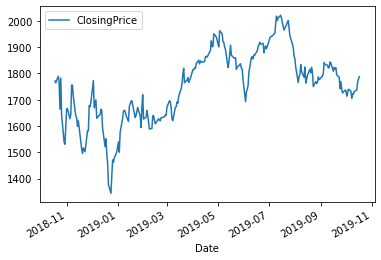

In [22]:
df.plot()

### --1--

In [23]:
Recent_period=3
df.ClosingPrice[-Recent_period:]

Date
2019-10-15    1767.380005
2019-10-16    1777.430054
2019-10-17    1787.479980
Name: ClosingPrice, dtype: float64

In [25]:
df_recent_period = df[-Recent_period:]
df_recent_period.head()

,ClosingPrice
Date,
2019-10-15,1767.380005
2019-10-16,1777.430054
2019-10-17,1787.479980


In [26]:
# average value:
df_recent_period.ClosingPrice.mean()

1777.430013

In [27]:
# sum value:
df_recent_period.ClosingPrice.sum()

5332.2900389999995

### --2--

In [29]:
df.ClosingPrice.rolling(window=50).mean()

Date
2018-10-18            NaN
2018-10-19            NaN
2018-10-22            NaN
2018-10-23            NaN
2018-10-24            NaN
                 ...     
2019-10-11    1782.233000
2019-10-14    1780.496802
2019-10-15    1780.541802
2019-10-16    1780.333804
2019-10-17    1780.215403
Name: ClosingPrice, Length: 251, dtype: float64

In [30]:
moving_average_50=df.ClosingPrice.rolling(window=50).mean().shift(1)
moving_average_200=df.ClosingPrice.rolling(window=200).mean().shift(1)
print("average of past 50 days:")
print(moving_average_50)
print("average of past 200 days")
print(moving_average_200)

average of past 50 days:
Date
2018-10-18            NaN
2018-10-19            NaN
2018-10-22            NaN
2018-10-23            NaN
2018-10-24            NaN
                 ...     
2019-10-11    1784.700999
2019-10-14    1782.233000
2019-10-15    1780.496802
2019-10-16    1780.541802
2019-10-17    1780.333804
Name: ClosingPrice, Length: 251, dtype: float64
average of past 200 days
Date
2018-10-18            NaN
2018-10-19            NaN
2018-10-22            NaN
2018-10-23            NaN
2018-10-24            NaN
                 ...     
2019-10-11    1786.454201
2019-10-14    1787.759301
2019-10-15    1789.133251
2019-10-16    1790.580051
2019-10-17    1791.957352
Name: ClosingPrice, Length: 251, dtype: float64


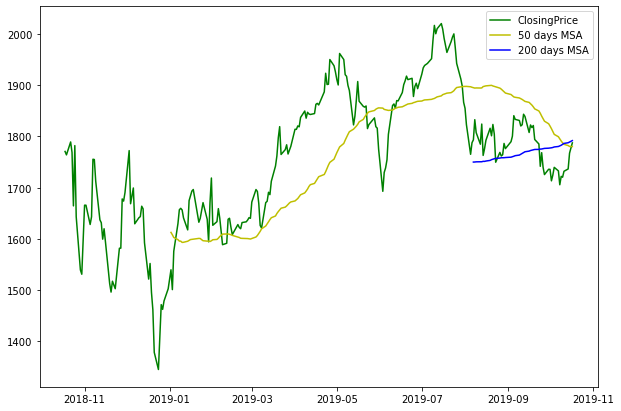

In [37]:
plt.figure(figsize=(10,7))

plt.plot(df.index,df.ClosingPrice,'g',label='ClosingPrice')
plt.plot(df.index,moving_average_50,'y',label='50 days MSA')
plt.plot(df.index,moving_average_200,'b',label='200 days MSA')

plt.legend()

plt.show()

### --3--


In [39]:
from sklearn.metrics import mean_squared_error

mean_squared_error(df.ClosingPrice[50:],moving_average_50[50:])

8144.052112421451

In [40]:
mean_squared_error(df.ClosingPrice[200:],moving_average_200[200:])

2325.0925088613544